# 1 Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 2 Data

In [2]:
import pandas as pd
df = pd.read_csv("corona.csv")

/tmp/ipykernel_11640/1256925906.py:2: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("corona.csv")


## 2.1 Brief Explanation of the Data:

Column Descriptors:

ID (Individual ID)

Sex (male/female).

Age ≥60 above years (true/false)

Test date (date when tested for COVID)

B. Symptoms:

Cough (true/false).

Fever (true/false).

Sore throat (true/false).

Shortness of breath (true/false).

Headache (true/false).

C. Other information:

Known contact with an individual confirmed to have COVID-19 (true/false).
D. Covid report

Corona positive or negative



# 3. EDA 

In [3]:
print("Dataset Information:\n")
df.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [4]:
df.describe()

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


In [5]:
df.shape

(278848, 11)

In [6]:
print("Columns:")
print(df.columns)

Columns:
Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')


In [7]:
print("Unique Values:")
print(df.nunique())

Unique Values:
Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      3
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64


In [8]:
df.isnull().sum() 

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [9]:
df.dropna(subset=['Cough_symptoms', 'Fever','Sore_throat','Shortness_of_breath'],inplace=True)  

In [10]:
df.isnull().sum() 

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           127315
Sex                     19552
Known_contact               0
dtype: int64

In [11]:
df.drop(columns=['Age_60_above', 'Sex','Test_date','Ind_ID'], inplace=True)
df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,True,False,True,False,False,negative,Abroad
1,False,True,False,False,False,positive,Abroad
2,False,True,False,False,False,positive,Abroad
3,True,False,False,False,False,negative,Abroad
4,True,False,False,False,False,negative,Contact with confirmed
...,...,...,...,...,...,...,...
278843,False,False,False,False,False,positive,Other
278844,False,False,False,False,False,negative,Other
278845,False,False,False,False,False,negative,Other
278846,False,False,False,False,False,negative,Other


In [12]:
df.nunique()

Cough_symptoms         2
Fever                  2
Sore_throat            2
Shortness_of_breath    2
Headache               2
Corona                 3
Known_contact          3
dtype: int64

In [13]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Cough_symptoms': [True False]
Unique values in column 'Fever': [False True]
Unique values in column 'Sore_throat': [True False]
Unique values in column 'Shortness_of_breath': [False True]
Unique values in column 'Headache': [False True]
Unique values in column 'Corona': ['negative' 'positive' 'other']
Unique values in column 'Known_contact': ['Abroad' 'Contact with confirmed' 'Other']


In [14]:
mask = (df['Corona'] != 'other') & (df['Known_contact'] != 'Other')

df = df[mask]

In [15]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Cough_symptoms': [True False]
Unique values in column 'Fever': [False True]
Unique values in column 'Sore_throat': [True False]
Unique values in column 'Shortness_of_breath': [False True]
Unique values in column 'Headache': [False True]
Unique values in column 'Corona': ['negative' 'positive']
Unique values in column 'Known_contact': ['Abroad' 'Contact with confirmed']


In [16]:
df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,True,False,True,False,False,negative,Abroad
1,False,True,False,False,False,positive,Abroad
2,False,True,False,False,False,positive,Abroad
3,True,False,False,False,False,negative,Abroad
4,True,False,False,False,False,negative,Contact with confirmed
...,...,...,...,...,...,...,...
278188,False,False,False,False,False,positive,Contact with confirmed
278211,False,False,False,False,False,positive,Contact with confirmed
278214,False,False,False,False,False,positive,Contact with confirmed
278470,False,False,False,False,False,positive,Contact with confirmed


# 3.1 Categorical Data Distribution

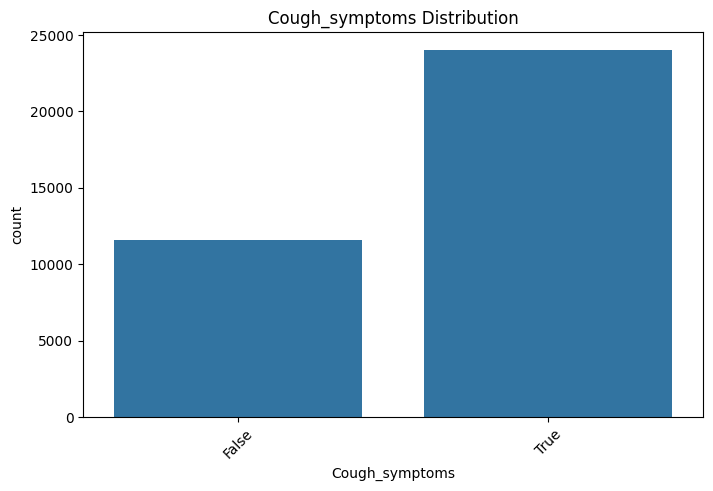

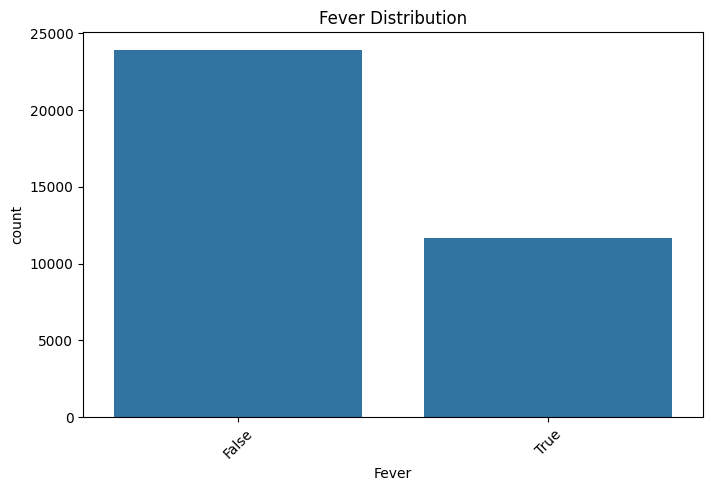

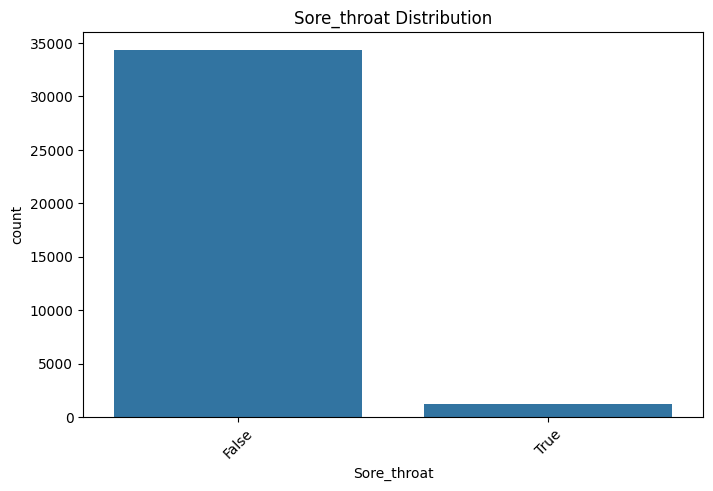

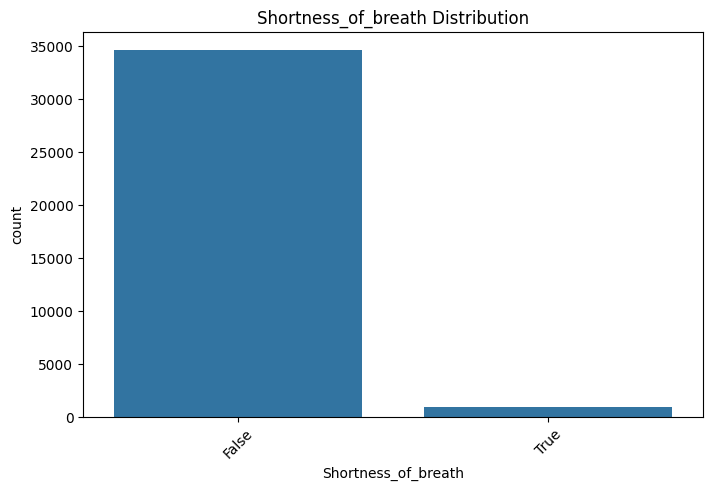

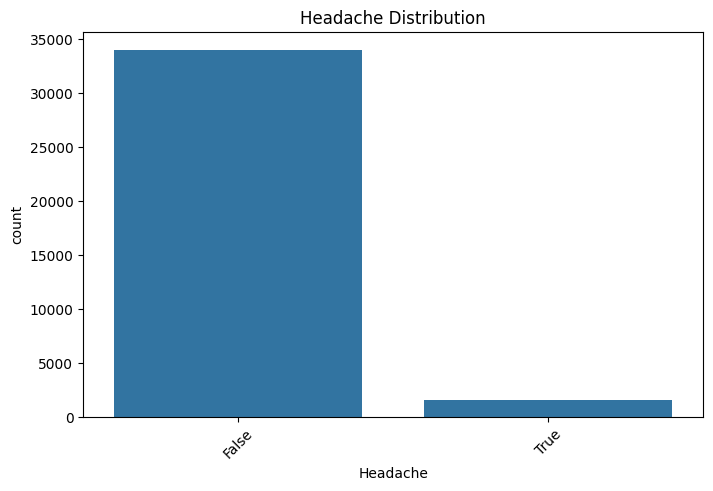

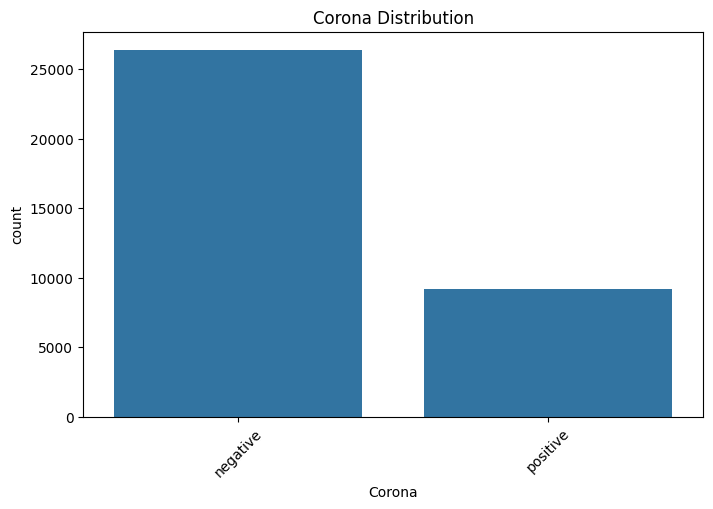

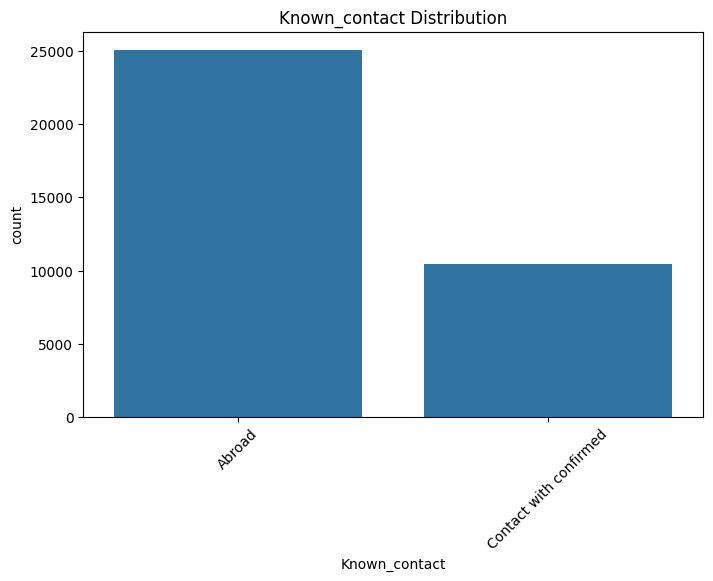

In [17]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()

In [18]:
categorical_columns

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,True,False,True,False,False,negative,Abroad
1,False,True,False,False,False,positive,Abroad
2,False,True,False,False,False,positive,Abroad
3,True,False,False,False,False,negative,Abroad
4,True,False,False,False,False,negative,Contact with confirmed
...,...,...,...,...,...,...,...
278188,False,False,False,False,False,positive,Contact with confirmed
278211,False,False,False,False,False,positive,Contact with confirmed
278214,False,False,False,False,False,positive,Contact with confirmed
278470,False,False,False,False,False,positive,Contact with confirmed


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

/tmp/ipykernel_11640/2467855174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipykernel_11640/2467855174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipykernel_11640/2467855174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [20]:
df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,1,0,1,0,0,0,0
1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
278188,0,0,0,0,0,1,1
278211,0,0,0,0,0,1,1
278214,0,0,0,0,0,1,1
278470,0,0,0,0,0,1,1


# 3.3. Correlation Analysis

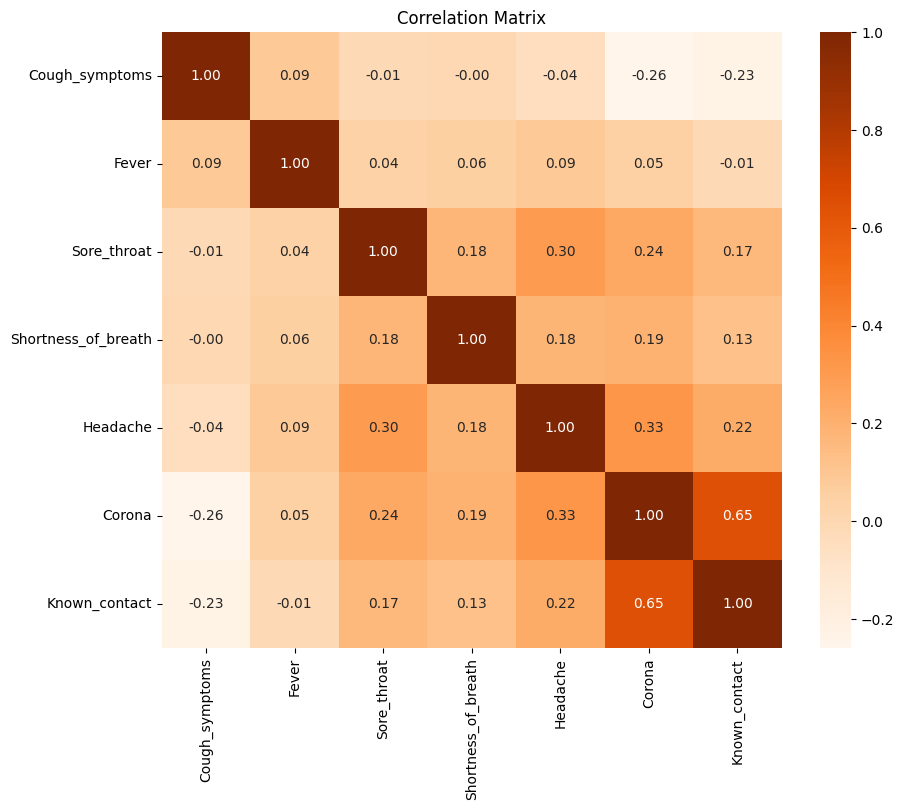

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [22]:
df.describe()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
count,35535.000000,35535.000000,35535.000000,35535.000000,35535.000000,35535.000000,35535.000000
mean,0.674799,0.328155,0.034754,0.026115,0.043900,0.258168,0.294555
std,0.468456,0.469548,0.183160,0.159480,0.204876,0.437633,0.455849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35535 entries, 0 to 278471
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Cough_symptoms       35535 non-null  int64
 1   Fever                35535 non-null  int64
 2   Sore_throat          35535 non-null  int64
 3   Shortness_of_breath  35535 non-null  int64
 4   Headache             35535 non-null  int64
 5   Corona               35535 non-null  int64
 6   Known_contact        35535 non-null  int64
dtypes: int64(7)
memory usage: 2.2 MB


# 4.Data Splitting

In [24]:
x = df.drop(['Corona'], axis=1)
y = df['Corona']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# 5. StandardScaler

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 6 DecisionTreeClassifier Model Training and Evaluation

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(X_train, y_train)

y_pred_decision_tree = decision_tree_model.predict(X_test)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
confusion_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
classification_rep_decision_tree = classification_report(y_test, y_pred_decision_tree)

print("Decision Tree Model:")
print(f"Accuracy: {accuracy_decision_tree:.2f}")
print("Confusion Matrix:\n", confusion_decision_tree)
print("Classification Report:\n", classification_rep_decision_tree)

Decision Tree Model:
Accuracy: 0.88
Confusion Matrix:
 [[4925  366]
 [ 485 1331]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      5291
           1       0.78      0.73      0.76      1816

    accuracy                           0.88      7107
   macro avg       0.85      0.83      0.84      7107
weighted avg       0.88      0.88      0.88      7107



# 7. Saving The Model

In [28]:
import joblib
joblib.dump(decision_tree_model, 'Decision-Tree-Classifier.pkl')

['Decision-Tree-Classifier.pkl']